In [1]:
import peptide_anisotropy as pa

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.optimize
import pandas as pd

import re

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


### Nomenclature
List o peptides with their names


## Fig S6A,B: Determine probe affinity

Measure FA for labeled 'cacon' probe peptide with increasing [protein] to measure affinity of protein for probe. Do this in both the presence and absence of calcium to verify binding is calcium dependent.  Put in human S100A9 as a negative control, as this protein is evolutionarily distant and is not expected to bind go the cacon peptide. 

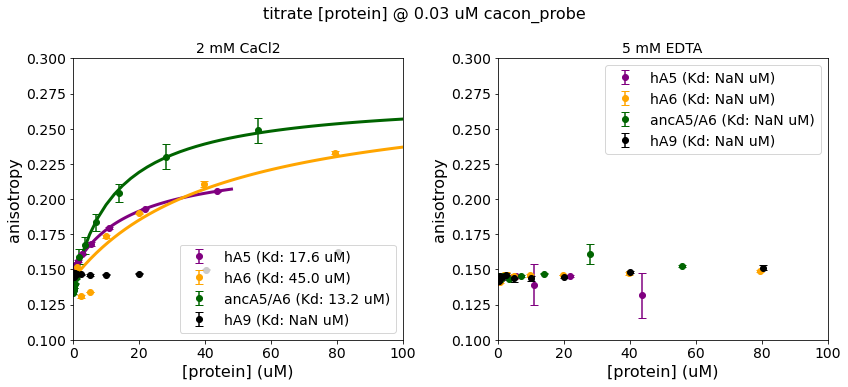

In [5]:
# Load in the experimental data, averaging technical replicates.

df, _ = pa.read_file("02_plate-output.txt","02_plate-layout.xlsx")

aA5A6_probe = pa.average_tech_reps(df[np.logical_and(df.protein == "aA5A6",
                                                     df.peptide == "cacon_probe")])

df, _ = pa.read_file("01_plate-output.txt","01_plate-layout.xlsx")
aA5A6_edta = pa.average_tech_reps(df[np.logical_and(df.protein == "aA5A6",
                                                    df.peptide == "cacon_probe_edta")])

hA5_probe = pa.average_tech_reps(df[np.logical_and(df.protein == "hA5",
                                                   df.peptide == "cacon_probe")])
hA5_edta = pa.average_tech_reps(df[np.logical_and(df.protein == "hA5",
                                                  df.peptide == "cacon_probe_edta")])

hA6_probe = pa.average_tech_reps(df[np.logical_and(df.protein == "hA6",
                                                   df.peptide == "cacon_probe")])
hA6_edta = pa.average_tech_reps(df[np.logical_and(df.protein == "hA6",
                                                   df.peptide == "cacon_probe_edta")])
               
hA9_probe = pa.average_tech_reps(df[np.logical_and(df.protein == "hA9",
                                                   df.peptide == "cacon_probe")])
hA9_edta = pa.average_tech_reps(df[np.logical_and(df.protein == "hA9",
                                                   df.peptide == "cacon_probe_edta")])

# Generate plots
fig, axes = plt.subplots(1,2,figsize=(12,5.5))

_, _, probe_fit = pa.fit_and_plot([hA5_probe,hA6_probe,aA5A6_probe,hA9_probe],
                                     color_list=["purple","orange","darkgreen","black"],
                                     name_list=["hA5","hA6","ancA5/A6","hA9"],
                                     xlim=(0,100),ylim=(0.1,0.3),title="2 mM CaCl2",
                                     xlabel="[protein] (uM)",
                                     fig=fig,ax=axes[0])

_, _, edta_fit = pa.fit_and_plot([hA5_edta,hA6_edta,aA5A6_edta,hA9_edta],
                                    color_list=["purple","orange","darkgreen","black"],
                                    name_list=["hA5","hA6","ancA5/A6","hA9"],
                                    xlim=(0,100),ylim=(0.1,0.3),keep_fit=False,title="5 mM EDTA",
                                    xlabel="[protein] (uM)",
                                    fig=fig,ax=axes[1])

fig.suptitle("titrate [protein] @ 0.03 uM cacon_probe",fontsize=16)
plt.tight_layout()
fig.subplots_adjust(top=0.85)

fig.savefig("fig_s6ab.pdf")


## Load data



In [6]:
df = pa.load_data(  [{"protein":"hA6",
                      "name_in_file":"hA6_4.3",
                      "Kd":45,
                      "prot_conc":4.2,
                      "probe_conc":4.2,
                      "data_file":"03_plate-output.txt",
                      "plate_file":"03_plate-layout.xlsx"},
                     {"protein":"hA6",
                      "name_in_file":"hA6_3.8",
                      "Kd":45,
                      "prot_conc":3.6,
                      "probe_conc":3.6,
                      "data_file":"03_plate-output.txt",
                      "plate_file":"03_plate-layout.xlsx"},
                     {"protein":"hA5",
                      "name_in_file":"hA5",
                      "Kd":17.6,
                      "prot_conc":2.7,
                      "probe_conc":3.0,
                      "data_file":"03_plate-output.txt",
                      "plate_file":"03_plate-layout.xlsx"},
                     {"protein":"hA5",
                      "name_in_file":"hA5",
                      "Kd":17.6,
                      "prot_conc":2.4,
                      "probe_conc":2.4,
                      "data_file":"00_plate-output.txt",
                      "plate_file":"00_plate-layout.xlsx"},
                     {"protein":"aA5A6",
                      "name_in_file":"aA5A6",
                      "Kd":13.5,
                      "prot_conc":2.3,
                      "probe_conc":2.3,
                      "data_file":"03_plate-output.txt",
                      "plate_file":"03_plate-layout.xlsx"},
                     {"protein":"aA5A6",
                      "name_in_file":"aA5A6",
                      "Kd":13.5,
                      "prot_conc":2.5,
                      "probe_conc":2.5,
                      "data_file":"00_plate-output.txt",
                      "plate_file":"00_plate-layout.xlsx"}])

df

,protein,peptide,plate,plate_row,plate_column,conc,r,r_err,weight,outlier_removed,rep_number,Kd_scalar,plate_file,data_file,name_in_file,plate_number
0,hA6,A5cons,1,A,"[7, 8, 9]",9.375000e-08,0.155994,0.000724,1.0,False,1,1.175586,03_plate-layout.xlsx,03_plate-output.txt,hA6_4.3,1
1,hA6,A5cons,1,B,"[7, 8, 9]",1.875000e-07,0.155976,0.000955,1.0,False,1,1.175586,03_plate-layout.xlsx,03_plate-output.txt,hA6_4.3,1
2,hA6,A5cons,1,C,"[7, 8, 9]",3.750000e-07,0.156340,0.000552,1.0,False,1,1.175586,03_plate-layout.xlsx,03_plate-output.txt,hA6_4.3,1
3,hA6,A5cons,1,D,"[7, 8, 9]",7.500000e-07,0.156537,0.000357,1.0,False,1,1.175586,03_plate-layout.xlsx,03_plate-output.txt,hA6_4.3,1
4,hA6,A5cons,1,E,"[7, 8, 9]",1.500000e-06,0.155703,0.000643,1.0,False,1,1.175586,03_plate-layout.xlsx,03_plate-output.txt,hA6_4.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,aA5A6,phage_ctl_9,15,H,"[7, 8, 9]",1.250000e-05,0.163255,0.000190,1.0,False,1,1.332121,00_plate-layout.xlsx,00_plate-output.txt,aA5A6,15
8,aA5A6,phage_ctl_9,15,A,"[10, 11, 12]",2.500000e-05,0.167818,0.001240,1.0,False,1,1.332121,00_plate-layout.xlsx,00_plate-output.txt,aA5A6,15
9,aA5A6,phage_ctl_9,15,B,"[10, 11, 12]",5.000000e-05,0.166728,0.000438,1.0,False,1,1.332121,00_plate-layout.xlsx,00_plate-output.txt,aA5A6,15
10,aA5A6,phage_ctl_9,15,C,"[10, 11, 12]",1.000000e-04,0.165215,0.000624,1.0,False,1,1.332121,00_plate-layout.xlsx,00_plate-output.txt,aA5A6,15


## Fig S6C: Measure affinity of unlabeled competitor peptide by competition

/Users/harmsm/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/harmsm/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/harmsm/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

[(1.872715802248757e-06, 5.271537073605327e-05, -0.011511879060520775),
 (9.361483152763651e-06, -0.0010415262835713737, -0.0067003656512594646),
 (5.131918965828245e-06, 0.00014955922547438307, -0.017313212315681364)]

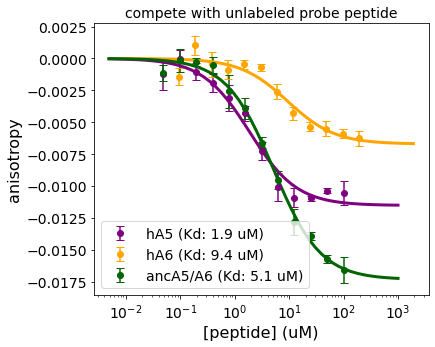

In [11]:

# Grab slices from data frame containing data
hA5_A6cons = df[np.logical_and(df.protein == "hA5",df.peptide == "A6cons")]
hA6_A6cons = df[np.logical_and(df.protein == "hA6",df.peptide == "A6cons")]
aA5A6_A6cons = df[np.logical_and(df.protein == "aA5A6",df.peptide == "A6cons")]

# Offset so we are looking at change an anisotropy
A6cons = [hA5_A6cons,hA6_A6cons,aA5A6_A6cons]
for i in range(len(A6cons)):
    ref_value = np.float(A6cons[i].loc[:,"r"].iloc[1])
    r_values = np.array(A6cons[i].loc[:,"r"],dtype=np.float)
    A6cons[i].loc[:,"r"] = r_values - ref_value


fig, ax = plt.subplots(figsize=(6,5))

_, _, A6cons_fit = pa.fit_and_plot(A6cons,
                                 color_list=["purple","orange","darkgreen"],
                                 name_list=["hA5","hA6","ancA5/A6"],
                                 xlim=None,ylim=None,title="compete with unlabeled probe peptide",
                                 log=True,Kd_guess=1e-6,fig=fig,ax=ax,
                                 required_change_in_signal=None,
                                 offset_to_reference=True)
fig.savefig("fig_s6c.pdf")


/Users/harmsm/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/harmsm/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/harmsm/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

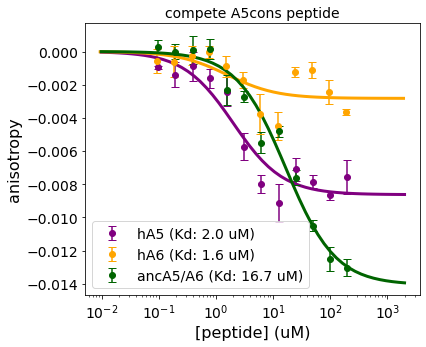

In [14]:

# Grab slices from data frame containing data
hA5_A5cons = df[np.logical_and(df.protein == "hA5",df.peptide == "A5cons")]
hA6_A5cons = df[np.logical_and(df.protein == "hA6",df.peptide == "A5cons")]
aA5A6_A5cons = df[np.logical_and(df.protein == "aA5A6",df.peptide == "A5cons")]

# Offset so we are looking at change an anisotropy
A5cons = [hA5_A5cons,hA6_A5cons,aA5A6_A5cons]
for i in range(len(A5cons)):
    ref_value = np.float(A5cons[i].loc[:,"r"].iloc[1])
    r_values = np.array(A5cons[i].loc[:,"r"],dtype=np.float)
    A5cons[i].loc[:,"r"] = r_values - ref_value


fig, ax = plt.subplots(figsize=(6,5))

_, _, A5cons_fit = pa.fit_and_plot(A5cons,
                                 color_list=["purple","orange","darkgreen"],
                                 name_list=["hA5","hA6","ancA5/A6"],
                                 xlim=None,ylim=None,title="compete A5cons peptide",
                                 log=True,Kd_guess=1e-6,fig=fig,ax=ax,
                                 required_change_in_signal=None,
                                 offset_to_reference=True)
#fig.savefig("fig_s6c.pdf")

In [51]:
df

,protein,peptide,plate,plate_row,plate_column,conc,r,r_err,weight,outlier_removed,rep_number,Kd_scalar,plate_file,data_file,name_in_file,plate_number
0,hA6,A5cons,1,A,"[7, 8, 9]",9.375000e-08,0.155994,0.000724,1.0,False,1,1.175586,03_plate-layout.xlsx,03_plate-output.txt,hA6_4.3,1
1,hA6,A5cons,1,B,"[7, 8, 9]",1.875000e-07,0.155976,0.000955,1.0,False,1,1.175586,03_plate-layout.xlsx,03_plate-output.txt,hA6_4.3,1
2,hA6,A5cons,1,C,"[7, 8, 9]",3.750000e-07,0.156340,0.000552,1.0,False,1,1.175586,03_plate-layout.xlsx,03_plate-output.txt,hA6_4.3,1
3,hA6,A5cons,1,D,"[7, 8, 9]",7.500000e-07,0.156537,0.000357,1.0,False,1,1.175586,03_plate-layout.xlsx,03_plate-output.txt,hA6_4.3,1
4,hA6,A5cons,1,E,"[7, 8, 9]",1.500000e-06,0.155703,0.000643,1.0,False,1,1.175586,03_plate-layout.xlsx,03_plate-output.txt,hA6_4.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,aA5A6,phage_ctl_9,15,H,"[7, 8, 9]",1.250000e-05,0.163255,0.000190,1.0,False,1,1.332121,00_plate-layout.xlsx,00_plate-output.txt,aA5A6,15
8,aA5A6,phage_ctl_9,15,A,"[10, 11, 12]",2.500000e-05,0.167818,0.001240,1.0,False,1,1.332121,00_plate-layout.xlsx,00_plate-output.txt,aA5A6,15
9,aA5A6,phage_ctl_9,15,B,"[10, 11, 12]",5.000000e-05,0.166728,0.000438,1.0,False,1,1.332121,00_plate-layout.xlsx,00_plate-output.txt,aA5A6,15
10,aA5A6,phage_ctl_9,15,C,"[10, 11, 12]",1.000000e-04,0.165215,0.000624,1.0,False,1,1.332121,00_plate-layout.xlsx,00_plate-output.txt,aA5A6,15


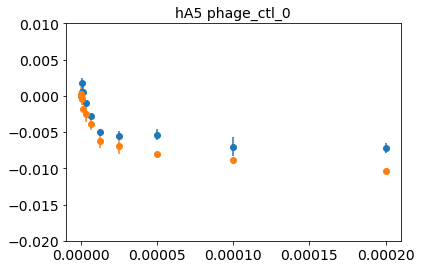

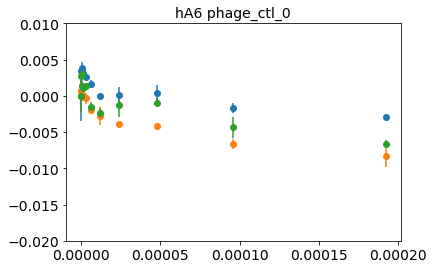

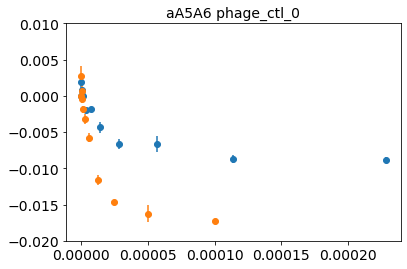

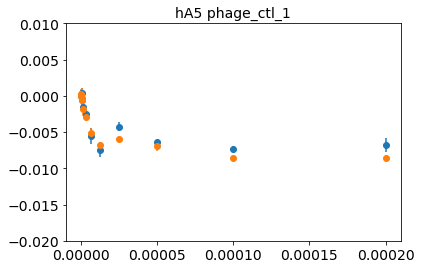

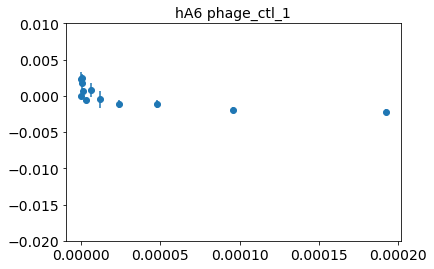

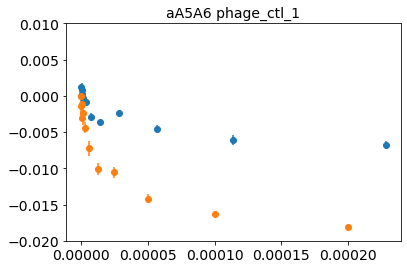

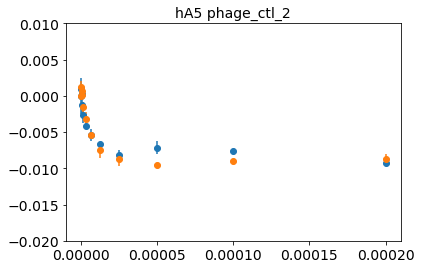

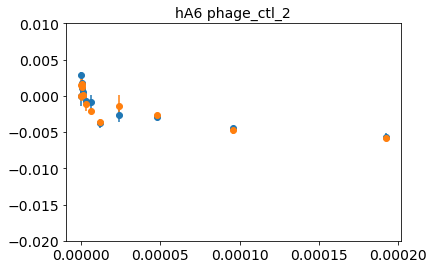

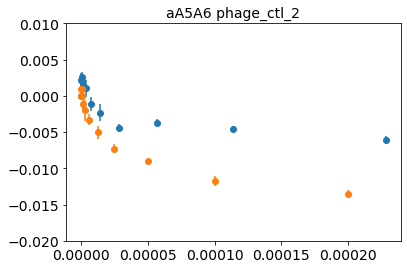

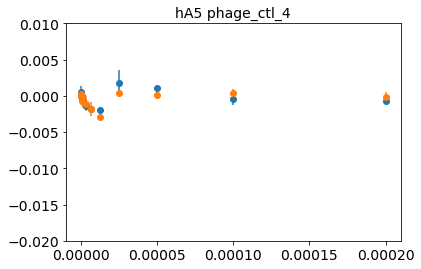

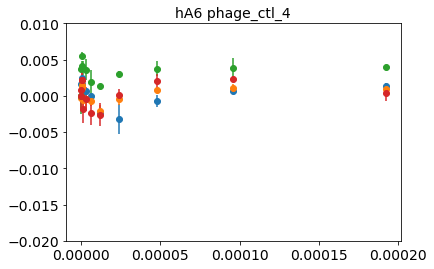

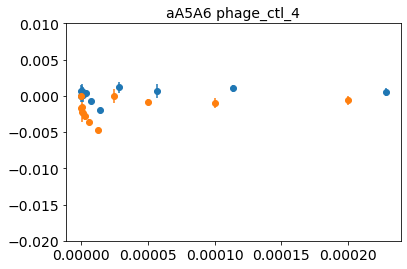

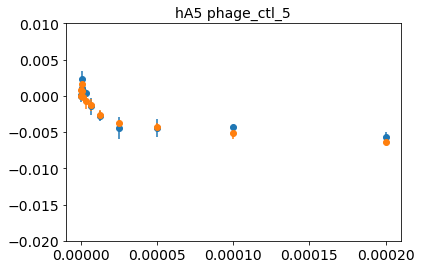

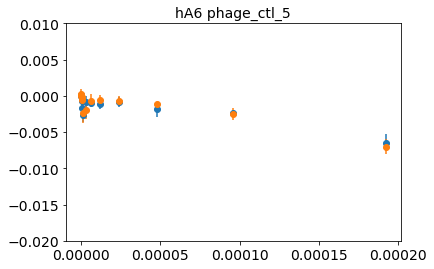

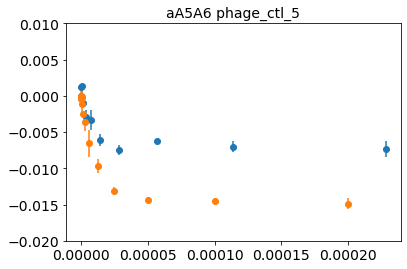

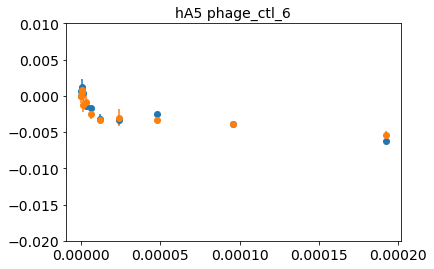

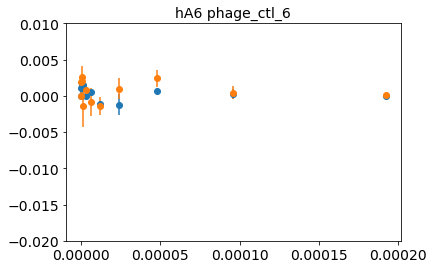

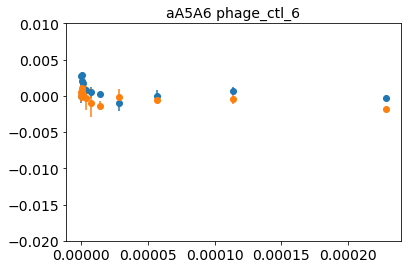

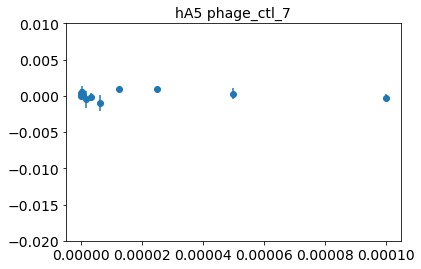

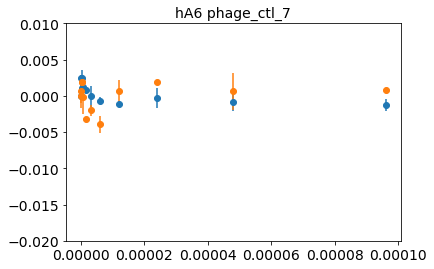

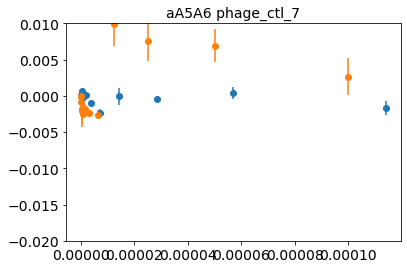

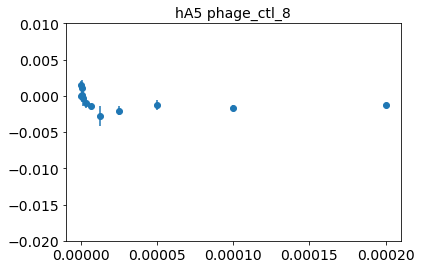

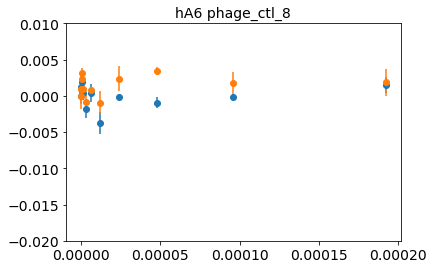

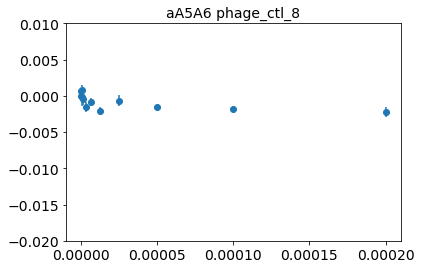

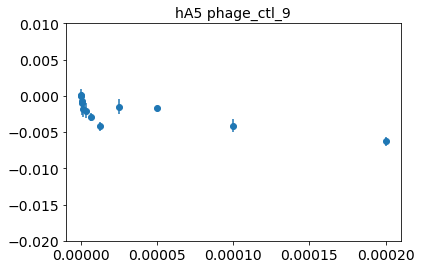

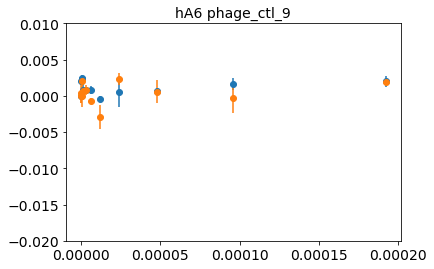

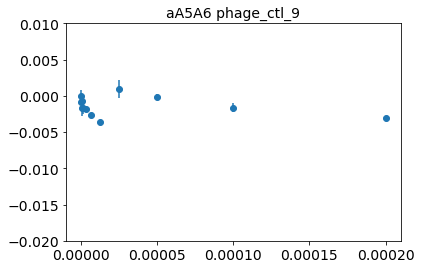

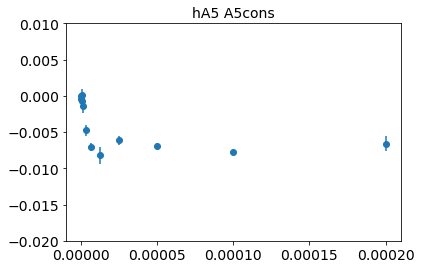

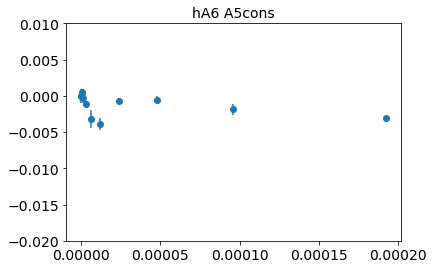

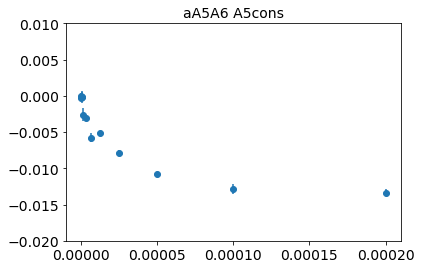

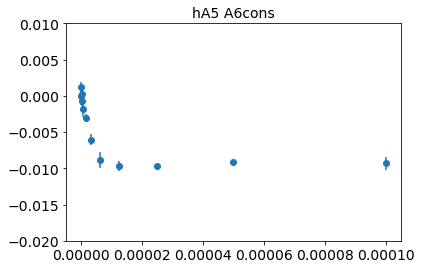

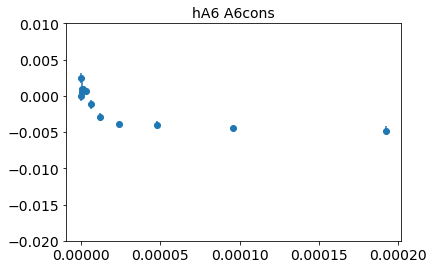

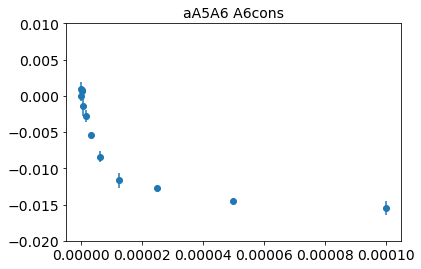

In [57]:

for peptide in ["phage_ctl_0","phage_ctl_1","phage_ctl_2","phage_ctl_4","phage_ctl_5","phage_ctl_6",
                "phage_ctl_7","phage_ctl_8","phage_ctl_9","A5cons","A6cons"]:
    
    for protein in ["hA5","hA6","aA5A6"]:

        x = df[np.logical_and(df.protein==protein,df.peptide==peptide)]
        for r in np.unique(x.rep_number):
            y = x[x.rep_number == r]
            y.loc[:,"r"] = y.loc[:,"r"] - y.loc[:,"r"][0]
            
            plt.errorbar(y.conc,y.r,y.r_err,fmt="o")
        plt.title(f"{protein} {peptide}")
        plt.ylim((-0.02,0.01))
        plt.show()
    


/Users/harmsm/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/harmsm/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/harmsm/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

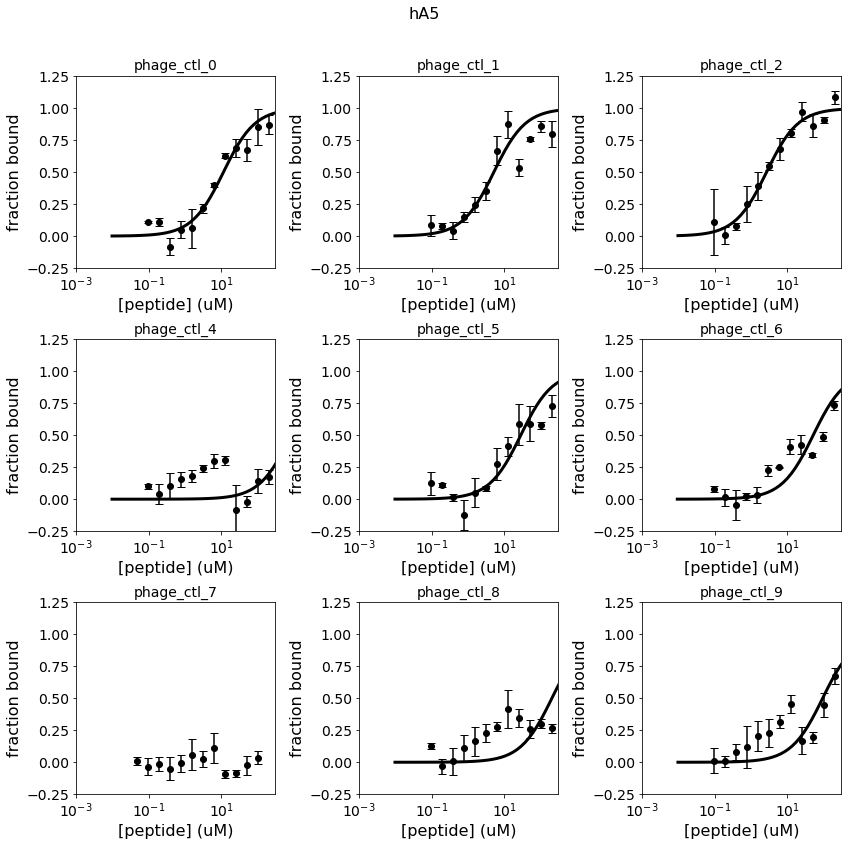

/Users/harmsm/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/harmsm/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/harmsm/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

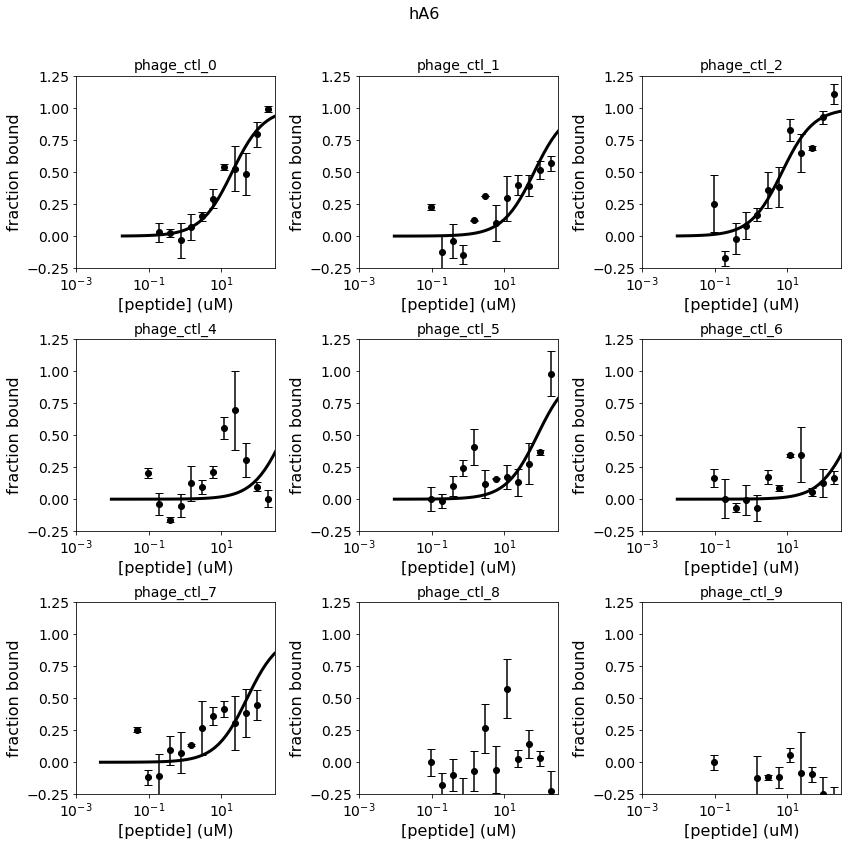

/Users/harmsm/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/harmsm/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/harmsm/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

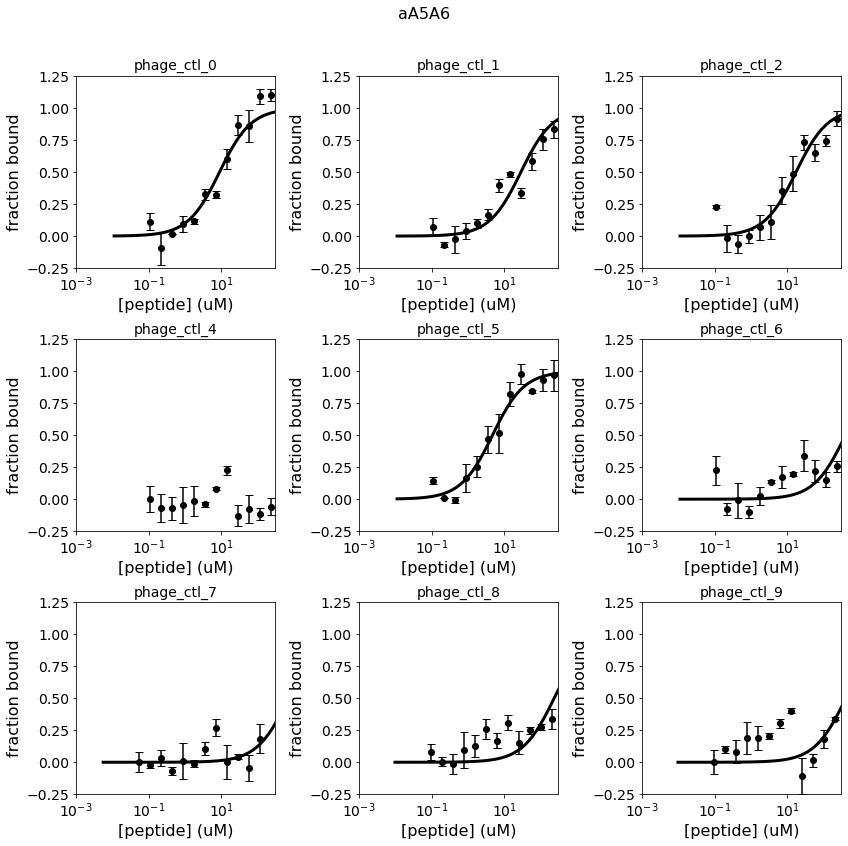

In [9]:

def plot_and_summarize_protein(df,protein,
                               phage_peptides,
                               required_change_in_signal=None,
                               fig_file=None,ref_peptide="phage_ctl_2"):

    fit_dict = {}
    all_colors = ["black","red","blue","orange","darkgreen"]

    prot_df = df[df.protein == protein]
    
    row = 0
    column = 0
    fig, axes = plt.subplots(3,3,figsize=(12,12))
    
    try:
        fit_dict[protein]
    except KeyError:
        fit_dict[protein] = {}

    # Get the fully saturated and fully unsaturated baselines from a reference
    # peptide.  
    baselines = []
    ref_df = prot_df[prot_df.peptide == ref_peptide]
    for i, rep in enumerate(np.unique(ref_df.rep_number)):
        rep_df = ref_df[ref_df.rep_number == rep]
        df_list = [rep_df]
        _, _, fit = pa.fit_and_plot(df_list,plot=False,offset_to_reference=True)
        
        baselines.append((0,fit[0][2]))

    # Go through data and find "0" baseline for each peptide. 
    for peptide in phage_peptides:
        pep_df = prot_df[prot_df.peptide == peptide]
    
        df_list = []
        name_list = []
        color_list = []
        scalar_list = []
        baseline_list = []
        for i, rep in enumerate(np.unique(pep_df.rep_number)):
            if i == 1:
                break
            
            rep_df = pep_df[pep_df.rep_number == rep]
            
            # Offset rep_df so 0 competitor baseline is 0
            _, _, fit = pa.fit_and_plot([rep_df],plot=False,offset_to_reference=False)
            if np.isnan(fit[0][1]):
                offset = np.mean(rep_df.r.iloc[:1])
            else:
                offset = fit[0][1]
            
            rep_df.loc[:,"r"] = rep_df.loc[:,"r"] - offset
            
            # HACK!  DID EXTRA REPS ON SAME DAY FOR A FEW PEPTIDES.  THIS GETS
            # THE RIGHT BASELINE, BUT JUST BY TAKING THE LAST BASELINE IN THE
            # STACK. 
            try:
                baseline = baselines[i]
            except IndexError:
                baseline = baselines[-1]
            
            # Convert rep_df to go from 0 to 1 
            rep_df.loc[:,"r"] = (rep_df.loc[:,"r"] - baseline[0])/baseline[1]
            rep_df.loc[:,"r_err"] = (rep_df.loc[:,"r_err"])/np.abs(baseline[1])
            
            # Record new ref_df, name, color, Kd_peptide_scalar, and baselines
            df_list.append(rep_df)
            name_list.append(f"{rep}")
            color_list.append(all_colors[i])
            scalar_list.append(rep_df.Kd_scalar.iloc[0])
            baseline_list.append((0,1))
                    
        Kd_list = []
        for i in range(10):
            df_list_sampled = []
            for j in range(len(df_list)):
                d = df_list[j].copy()
                d.r = np.random.normal(d.r,d.r_err)
                df_list_sampled.append(d)
            
            _, _, fit = pa.fit_and_plot(df_list_sampled,
                                        baseline_list=baseline_list,
                                        offset_to_reference=False,
                                        plot=False)
                                        #   #required_change_in_signal=required_change_in_signal,
                                        #  color_list=color_list,
                                        #  name_list=name_list,
                                        #  xlim=(0.001,300),ylim=(-0.25,1.25),
                                        #  log=True,Kd_guess=1e-6,
                                        #  fig=fig,ax=axes[row,column],
                                        #  ylabel="fraction bound",
                                        #  alpha=0.1,legend=False,plot_err=False)
            
            Kd_list.extend([f[0]*scalar_list[j] for j, f in enumerate(fit)])
        
        
        # ML FIT
        fig, ax, fit = pa.fit_and_plot(df_list,
                                baseline_list=baseline_list,
                                offset_to_reference=False,
                                  color_list=color_list,
                                  name_list=name_list,
                                  xlim=(0.001,300),ylim=(-0.25,1.25),
                                  log=True,Kd_guess=1e-6,
                                  fig=fig,ax=axes[row,column],
                                  ylabel="fraction bound",
                                  alpha=1.0,legend=False)

        try:
            fit_dict[protein][peptide]
        except KeyError:
            fit_dict[protein][peptide] = []

        # Record Kd, with Kd_peptide_scalar appropriate for experimental conditions
        fit_dict[protein][peptide] = [Kd_list]
        
        axes[row,column].set_title("{}".format(peptide))

        column += 1
        if column > 2:
            column = 0
            row += 1


    fig.suptitle(f"{protein}",fontsize=16)
    plt.tight_layout()
    fig.subplots_adjust(top=0.90)
    
    if fig_file is not None:
        plt.savefig(f"{protein}.pdf")
        
    plt.show()

    return fit_dict
    

phage_peptides = [f"phage_ctl_{i}" for i in range(10)]
phage_peptides.remove("phage_ctl_3")

fit_dict = {}
filtered_df = df.copy()
#filtered_df = df[np.logical_not(np.logical_and(df.peptide=="phage_ctl_4",df.conc>20e-6))]
#filtered_df = filtered_df[np.logical_not(np.logical_and(filtered_df.peptide=="phage_ctl_7",filtered_df.conc>20e-6))]
#filtered_df = filtered_df[np.logical_not(np.logical_and(filtered_df.peptide=="phage_ctl_8",filtered_df.conc>20e-6))]
#filtered_df = filtered_df[np.logical_not(np.logical_and(filtered_df.peptide=="phage_ctl_9",filtered_df.conc>20e-6))]
#filtered_df = filtered_df[np.logical_not(np.logical_and(filtered_df.peptide=="phage_ctl_6",filtered_df.conc>20e-6))]
filtered_df = filtered_df[np.logical_not(np.logical_and(filtered_df.protein=="hA6",
                                                        np.logical_and(filtered_df.peptide=="phage_ctl_0",
                                                                       filtered_df.conc<0.15e-6)))]

fit_results = plot_and_summarize_protein(filtered_df,"hA5",phage_peptides,
                                         required_change_in_signal=None,
                                         fig_file="hA5_phage-peptides.pdf")
fit_dict["hA5"] = fit_results["hA5"]

fit_results = plot_and_summarize_protein(filtered_df,"hA6",phage_peptides,
                                         required_change_in_signal=None,
                                         fig_file="hA6_phage-peptides.pdf")
fit_dict["hA6"] = fit_results["hA6"]

fit_results = plot_and_summarize_protein(filtered_df,"aA5A6",phage_peptides,
                                         required_change_in_signal=None,
                                         ref_peptide="phage_ctl_5",
                                         fig_file="aA5A6_phage-peptides.pdf")
fit_dict["aA5A6"] = fit_results["aA5A6"]
#fit_dict

## Load other experimental data

In [10]:
enrich = pd.read_csv("peptide-enrichment.txt")
enrich_dict = {}
for i in range(len(enrich)):
    peptide = enrich.name.iloc[i]
    try:
        enrich_dict[peptide]
    except KeyError:
        enrich_dict[peptide] = {}
    
    enrich_dict[peptide]["hA5"] = enrich.iloc[i].hA5
    enrich_dict[peptide]["hA6"] = enrich.iloc[i].hA6
    enrich_dict[peptide]["aA5A6"] = enrich.iloc[i].aA5A6

itc = pd.read_csv("itc-values.txt")
itc_dict = {}
for i in range(len(itc.peptide)):
    peptide = itc.peptide.iloc[i]
    protein = itc.protein.iloc[i]
    try:
        itc_dict[peptide]
    except KeyError:
        itc_dict[peptide] = {}
    
    itc_dict[peptide][protein] = (1/itc.Ka.iloc[i],1/itc.Ka_err.iloc[i])

FileNotFoundError: [Errno 2] File peptide-enrichment.txt does not exist: 'peptide-enrichment.txt'

## Load FA dG, E, and ITC dG into a single frame

In [ ]:
out_dict = {"protein":[],
            "peptide":[],
            "Kd":[],
            "dG_mean":[],
            "dG_err":[],
            "E":[],
            "itc_dG":[]}

for prot in ["hA5","hA6","aA5A6"]: 
    
    for pep in fit_dict[prot].keys():
        
        try:
            Kd = fit_dict[prot][pep][0]
        except KeyError:
            continue
                
        dG = -0.001987*(273.15 + 27)*np.log(np.array(Kd))
        dG_mean = np.nanmean(dG)
        dG_err = np.nanstd(dG)
            
        try:
            E = enrich_dict[pep][prot]
        except KeyError:
            E = np.nan
        
        if np.isnan(dG_mean):
            dG_mean = np.nan
        
        
        out_dict["protein"].append(prot)
        out_dict["peptide"].append(pep)
        out_dict["Kd"].append(Kd)
        out_dict["dG_mean"].append(dG_mean)
        out_dict["dG_err"].append(dG_err)
        out_dict["E"].append(E)
        
        try:
            itc_dG = -0.001987*(273.15+25)*np.log(itc_dict[pep][prot][0])
        except KeyError:
            itc_dG = np.nan
            
        out_dict["itc_dG"].append(itc_dG)
        
import scipy.stats

        
out_df = pd.DataFrame(out_dict)
out_df = out_df[np.logical_not(np.isnan(out_df.dG_mean))]


#mask = [pep in ["phage_ctl_0","phage_ctl_1","phage_ctl_2","phage_ctl_5"] for pep in out_df.peptide]
#out_df = out_df[mask]

#bad_mask = [pep in ["phage_ctl_8","phage_ctl_9"] for pep in out_df.peptide]
#out_df.loc[bad_mask,"dG_mean"] = 0
#out_df.loc[np.logical_not(bad_mask),"dG_mean"] = 1
#out_df = out_df[out_df.E < 4] #np.logical_and(out_df.E > -5.5,out_df.E < 4)]
    

fig, ax = plt.subplots(figsize=(5,5))

color_list = ["purple","orange","darkgreen"]
for i, prot in enumerate(["hA5","hA6","aA5A6"]):
    
    prot_df = out_df[out_df.protein == prot]
    #prot_df = prot_df[prot_df.peptide != "phage_ctl_9"]
    ax.errorbar(prot_df.E,-prot_df.dG_mean,prot_df.dG_err,1,fmt="o",capsize=5,color=color_list[i])



m, b, r, p, err = scipy.stats.linregress(out_df.E,-out_df.dG_mean)
xrange = np.arange(-6,6.1,0.1)
ax.plot(xrange,xrange*m + b,lw=2,color="black")
ax.set_xlabel("E")
ax.set_ylabel("dG")
print(r**2,p)
out_df

## Compare dG to E

In [ ]:
out_df.loc[:,[c for c in out_df.columns if c != "Kd"]].to_csv("yo.csv")

In [ ]:
my_string = "test\this"

import re
re.escape(my_string)

#ecoded_string = bytes(my_string, "utf-8").decode("unicode_escape")
#rint(my_string)

#help(scipy.stats.linregress)

In [ ]:
x = out_df[out_df.protein != "hA6"]
x = x[x.peptide != "phage_ctl_6"]
x = x[x.peptide != "phage_ctl_3"]

x.loc[np.isnan(x.dG),"dG"] = 5.5
x1 = x[np.logical_not(x.dG == 5.5)]
x1 = x1[np.logical_not(np.isnan(x1.E))]

m, b = np.polyfit(x1.E,x1.dG,1)
xrange = np.arange(np.min(x.E),-1.37)

fig, ax = plt.subplots(figsize=(5,5))

ax.plot(xrange,xrange*m+b,"-",color="black")
ax.plot((-6,6),(5.5,5.5),"--",color="gray")
ax.set_xlabel("E")
ax.set_ylabel("$\Delta G^{\circ}_{dissociate}$ (kcal/mol)")
ax.set_title("comparison between E and dG")

for prot in np.unique(x.protein):
    x2 = x[x.protein == prot]
    ax.plot(x2.E,x2.dG,"o",label=prot)
    
ax.legend()

fig.savefig("compare-e-and-dg.pdf")

None


## Compare FA dG to ITC dG

In [ ]:
x2

In [ ]:
fig, ax = plt.subplots(1,1)

ax.set_xlabel("ITC dG (kcal/mol)")
ax.set_ylabel("FA dG (kcal/mol)")

x = out_df[out_df.protein != "hA6"]
for prot in np.unique(x.protein):
    x2 = x[x.protein == prot]
    ax.plot(x2.itc_dG,x2.dG_mean,"o",label=prot)

ax.plot([5.5,8.5],[5.5,8.5],"--",color="gray")
    
#ax.set_xlim(5.5,8.5)
#ax.set_ylim(5.5,8.5)
ax.set_aspect('equal', 'box')

ax.legend()
ax.set_title("compare ITC and FA")

fig.savefig("compare-itc-and-fa.pdf")

None

In [ ]:
#hA5: 9/1/2020
get_peptide_Kd_scalar(17.6,2.4,2.4)

In [ ]:
#hA5: 9/8/2020
get_peptide_Kd_scalar(17.6,2.4,2.4)

In [ ]:
#ancA5/A6: 9/1/2020
get_peptide_Kd_scalar(13.2,2.5,2.5)

In [ ]:
#ancA5/A6: 9/8/2020
get_peptide_Kd_scalar(13.2,2.3,2.3)

In [ ]:
#hA6: 9/8/2020
get_peptide_Kd_scalar(45.0,3.6,3.6)

In [ ]:
#hA6: 9/8/2020 (A5cons, A6cons only)
get_peptide_Kd_scalar(45.0,4.2,4.2)